# one sample T tests 

In [1]:
import numpy as np
from scipy import stats

sample_data = np.array([78, 82, 88, 74, 80, 76, 70, 90, 85, 79,
                        83, 81, 77, 84, 76, 92, 75, 77, 79, 81])
population_mean = 75

t_stat, p_value = stats.ttest_1samp(sample_data, population_mean)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")


T-statistic: 4.335858806831123
P-value: 0.0003560762089431515
Reject the null hypothesis: The sample mean is significantly different from the population mean.


Proportion of confidence intervals containing the population mean: 0.9510


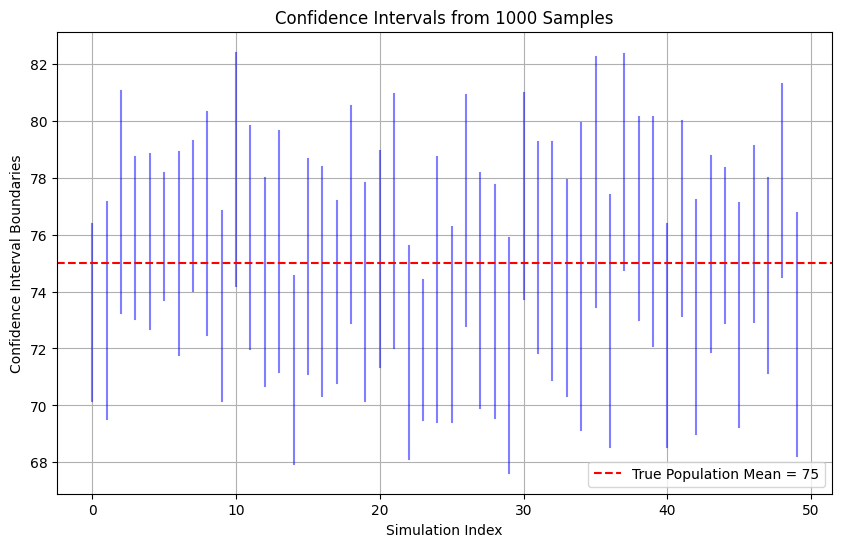

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the population
population_mean = 75
population_size = 10000  # Large population for simulation
population_std = 10  # Standard deviation of the population

# Create a population (random values with a normal distribution)
population = np.random.normal(loc=population_mean, scale=population_std, size=population_size)

# Parameters for the simulation
num_simulations = 1000  # Number of random samples to take
sample_size = 30  # Size of each sample
confidence_level = 0.95  # 95% confidence interval

# To track results
intervals_containing_population_mean = 0
confidence_intervals = []

# Perform simulations
for _ in range(num_simulations):
    # Take a random sample from the population
    sample = np.random.choice(population, size=sample_size, replace=False)

    # Calculate the sample mean and sample standard deviation
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  # Sample standard deviation (using ddof=1)

    # Calculate the standard error of the mean
    standard_error = sample_std / np.sqrt(sample_size)

    # Calculate the t critical value for 95% confidence
    t_critical = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

    # Margin of error
    margin_of_error = t_critical * standard_error

    # Confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    # Track whether the true population mean is within this confidence interval
    if lower_bound <= population_mean <= upper_bound:
        intervals_containing_population_mean += 1

    # Save the confidence interval for plotting
    confidence_intervals.append((lower_bound, upper_bound))

# Calculate the proportion of confidence intervals that contain the true population mean
proportion_containing_mean = intervals_containing_population_mean / num_simulations

# Print the result
print(f"Proportion of confidence intervals containing the population mean: {proportion_containing_mean:.4f}")

# Plotting the confidence intervals
plt.figure(figsize=(10, 6))
for i, (lower, upper) in enumerate(confidence_intervals[:50]):  # Plot first 50 intervals for clarity
    plt.plot([i, i], [lower, upper], color='blue', alpha=0.5)

# Add the true population mean line
plt.axhline(population_mean, color='red', linestyle='dashed', label=f'True Population Mean = {population_mean}')

# Customize plot
plt.title('Confidence Intervals from 1000 Samples')
plt.xlabel('Simulation Index')
plt.ylabel('Confidence Interval Boundaries')
plt.legend()
plt.grid(True)
plt.show()


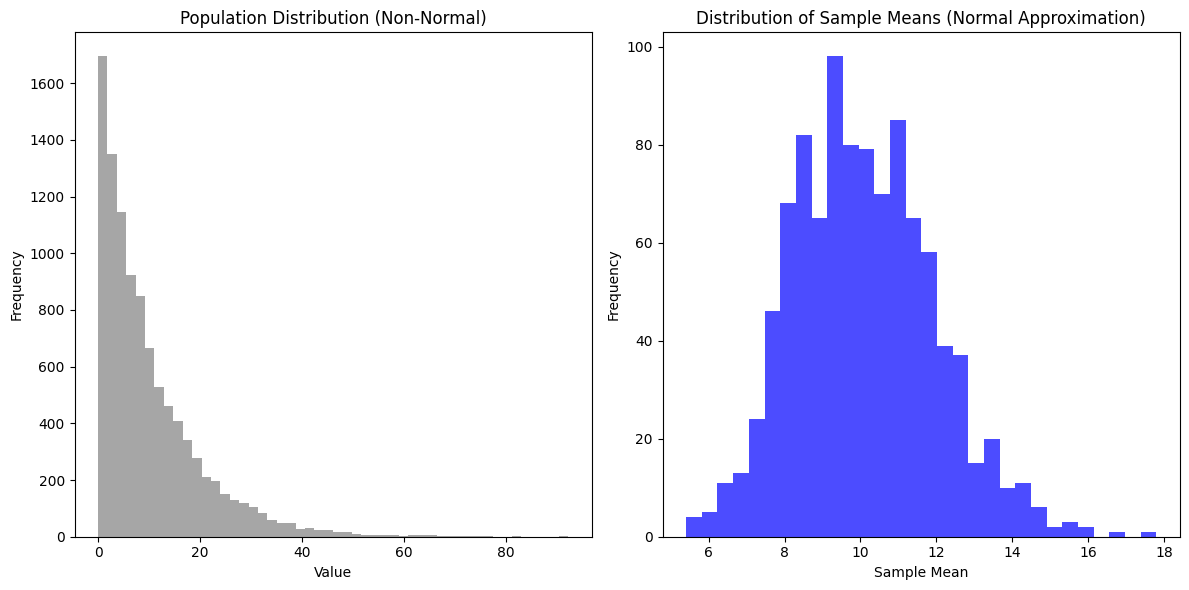

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a non-normal population (e.g., exponential distribution)
population_size = 10000
population = np.random.exponential(scale=10, size=population_size)

# Set sample size and number of simulations
sample_size = 30
num_simulations = 1000

# List to store the sample means
sample_means = []

# Perform the sampling
for _ in range(num_simulations):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

# Plot the population distribution and the distribution of sample means
plt.figure(figsize=(12, 6))

# Plot the population distribution (non-normal)
plt.subplot(1, 2, 1)
plt.hist(population, bins=50, color='gray', alpha=0.7)
plt.title("Population Distribution (Non-Normal)")
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot the distribution of sample means (normal)
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, color='blue', alpha=0.7)
plt.title("Distribution of Sample Means (Normal Approximation)")
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Sample 1: t-statistic = -0.173, p-value = 0.864
Sample 2: t-statistic = -0.263, p-value = 0.794
Sample 3: t-statistic = -2.035, p-value = 0.051
Sample 4: t-statistic = 0.521, p-value = 0.606
Sample 5: t-statistic = 1.042, p-value = 0.306
Sample 6: t-statistic = -0.347, p-value = 0.731
Sample 7: t-statistic = 0.176, p-value = 0.861
Sample 8: t-statistic = 0.203, p-value = 0.841
Sample 9: t-statistic = 1.451, p-value = 0.158
Sample 10: t-statistic = 0.915, p-value = 0.368


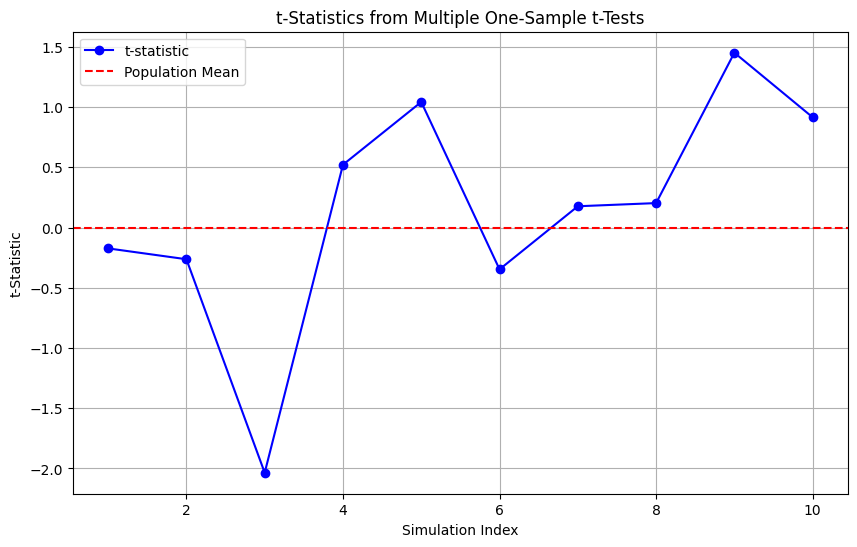

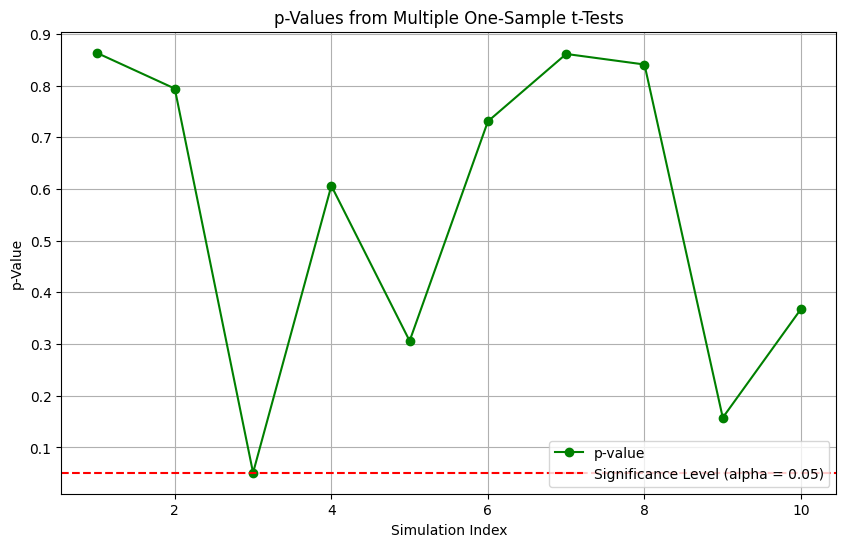

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
population_mean = 75  # True population mean
population_size = 10000  # Large population
population_std = 10  # Standard deviation of the population
sample_size = 30  # Sample size for each test
num_simulations = 10  # Number of t-tests to perform

# Create the population (normal distribution)
population = np.random.normal(loc=population_mean, scale=population_std, size=population_size)

# List to store t-test results
t_statistics = []
p_values = []

# Perform multiple one-sample t-tests
for i in range(num_simulations):
    # Randomly sample from the population
    sample = np.random.choice(population, size=sample_size, replace=False)
    
    # Perform one-sample t-test: H0: sample mean = population mean
    t_stat, p_value = stats.ttest_1samp(sample, population_mean)
    
    t_statistics.append(t_stat)
    p_values.append(p_value)
    
    # Print the result of each t-test
    print(f"Sample {i+1}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

# Plot the t-statistics
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_simulations + 1), t_statistics, marker='o', linestyle='-', color='blue', label='t-statistic')
plt.axhline(y=0, color='red', linestyle='--', label='Population Mean')
plt.title('t-Statistics from Multiple One-Sample t-Tests')
plt.xlabel('Simulation Index')
plt.ylabel('t-Statistic')
plt.legend()
plt.grid(True)
plt.show()

# Plot p-values
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_simulations + 1), p_values, marker='o', linestyle='-', color='green', label='p-value')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (alpha = 0.05)')
plt.title('p-Values from Multiple One-Sample t-Tests')
plt.xlabel('Simulation Index')
plt.ylabel('p-Value')
plt.legend()
plt.grid(True)
plt.show()


Sample 1: t-statistic = -0.592, p-value = 0.559
Sample 2: t-statistic = 1.159, p-value = 0.256
Sample 3: t-statistic = 1.747, p-value = 0.091
Sample 4: t-statistic = 0.586, p-value = 0.562
Sample 5: t-statistic = -1.877, p-value = 0.071
Sample 6: t-statistic = 0.083, p-value = 0.934
Sample 7: t-statistic = 0.816, p-value = 0.421
Sample 8: t-statistic = -1.329, p-value = 0.194
Sample 9: t-statistic = -0.530, p-value = 0.600
Sample 10: t-statistic = -0.129, p-value = 0.898


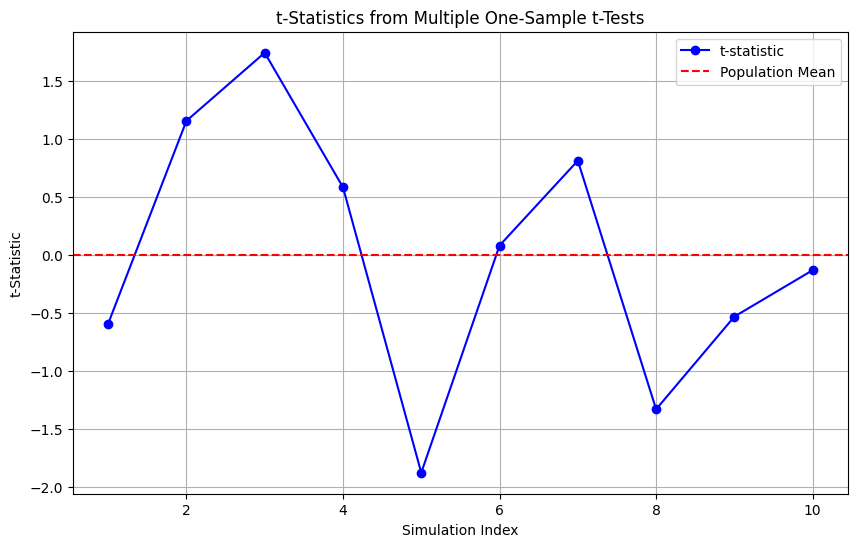

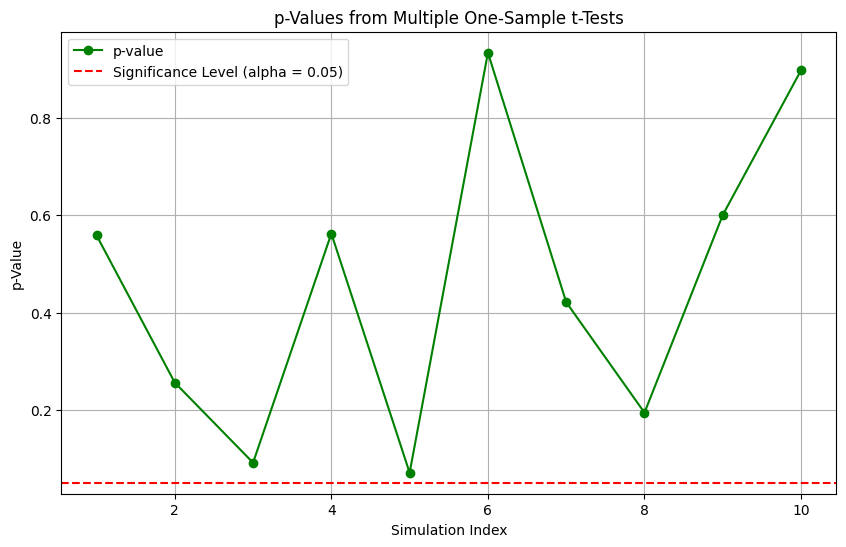

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
population_mean = 75  # True population mean
population_size = 10000  # Large population
population_std = 10  # Standard deviation of the population
sample_size = 30  # Sample size for each test
num_simulations = 10  # Number of t-tests to perform

# Create the population (normal distribution)
population = np.random.normal(loc=population_mean, scale=population_std, size=population_size)

# Lists to store results
t_statistics = []
p_values = []

# Perform multiple one-sample t-tests
for i in range(num_simulations):
    # Randomly sample from the population
    sample = np.random.choice(population, size=sample_size, replace=False)
    
    # Directly perform one-sample t-test using stats.ttest_1samp
    t_stat, p_value = stats.ttest_1samp(sample, population_mean)
    
    # Store results
    t_statistics.append(t_stat)
    p_values.append(p_value)
    
    # Print the result of each t-test
    print(f"Sample {i+1}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

# Plot the t-statistics
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_simulations + 1), t_statistics, marker='o', linestyle='-', color='blue', label='t-statistic')
plt.axhline(y=0, color='red', linestyle='--', label='Population Mean')
plt.title('t-Statistics from Multiple One-Sample t-Tests')
plt.xlabel('Simulation Index')
plt.ylabel('t-Statistic')
plt.legend()
plt.grid(True)
plt.show()

# Plot p-values
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_simulations + 1), p_values, marker='o', linestyle='-', color='green', label='p-value')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (alpha = 0.05)')
plt.title('p-Values from Multiple One-Sample t-Tests')
plt.xlabel('Simulation Index')
plt.ylabel('p-Value')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# break down the codes
population_mean = 75  # True population mean
population_size = 10000  # Large population
population_std = 10  # Standard deviation of the population
sample_size = 30  # Sample size for each test
num_simulations = 10  # Number of t-tests to perform

# Create the population (normal distribution)
population = np.random.normal(loc=population_mean, scale=population_std, size=population_size)

# Lists to store results
t_statistics = []
p_values = []

# Perform multiple one-sample t-tests
for i in range(num_simulations):
    # Randomly sample from the population
    sample = np.random.choice(population, size=sample_size, replace=False)
    
    # Directly perform one-sample t-test using stats.ttest_1samp
    t_stat, p_value = stats.ttest_1samp(sample, population_mean)
    
    # Store results
    t_statistics.append(t_stat)
    p_values.append(p_value)
    
    # Print the result of each t-test
    print(f"Sample {i+1}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")


Sample 1: t-statistic = 0.119, p-value = 0.906
Sample 2: t-statistic = 1.238, p-value = 0.226
Sample 3: t-statistic = 0.937, p-value = 0.356
Sample 4: t-statistic = -0.810, p-value = 0.424
Sample 5: t-statistic = 0.768, p-value = 0.449
Sample 6: t-statistic = -0.670, p-value = 0.508
Sample 7: t-statistic = 1.220, p-value = 0.232
Sample 8: t-statistic = 0.519, p-value = 0.608
Sample 9: t-statistic = -0.692, p-value = 0.494
Sample 10: t-statistic = -0.216, p-value = 0.831


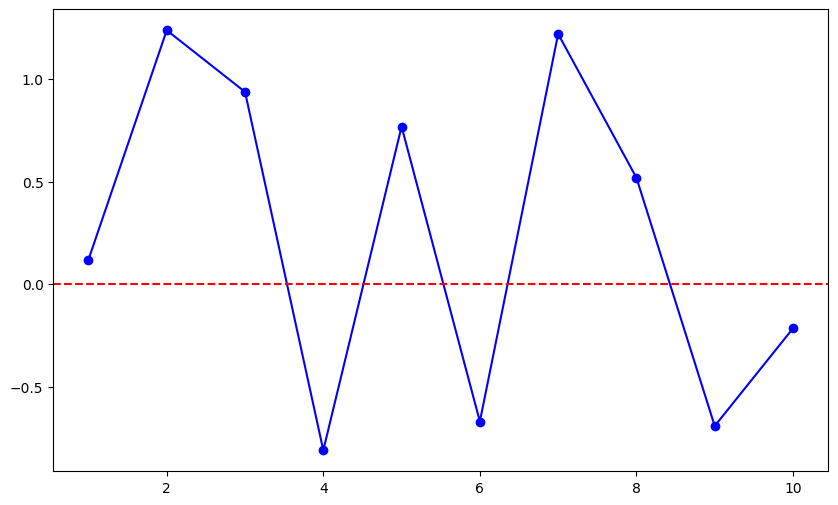

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_simulations + 1), t_statistics, marker='o', linestyle='-', color='blue', label='t-statistic')
plt.axhline(y=0, color='red', linestyle='--', label='Population Mean')

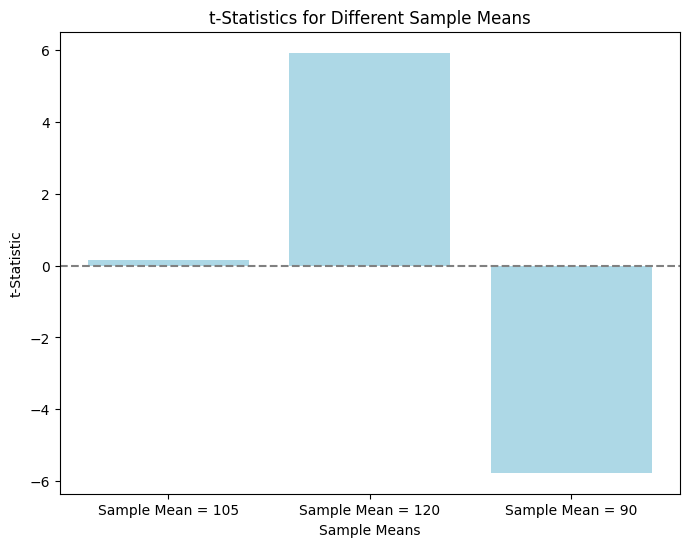

Sample Mean: 105
t-statistic: 0.151
------------------------------
Sample Mean: 120
t-statistic: 5.917
------------------------------
Sample Mean: 90
t-statistic: -5.762
------------------------------


In [11]:
# t statistics with the population means 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
population_mean = 100    # Known population mean
population_std = 15      # Standard deviation of the population
sample_size = 30         # Sample size

# Generate sample data for different sample means
sample_means = [105, 120, 90]  # Different sample means
t_statistics = []

# Calculate t-statistics for each sample mean
for sample_mean in sample_means:
    # Generate sample data (normal distribution with sample mean)
    sample_data = np.random.normal(loc=sample_mean, scale=population_std, size=sample_size)
    
    # Perform one-sample t-test
    t_stat, p_value = stats.ttest_1samp(sample_data, population_mean)
    
    # Store t-statistics
    t_statistics.append(t_stat)

# Plot the t-statistics for each sample mean
plt.figure(figsize=(8, 6))
plt.bar(['Sample Mean = 105', 'Sample Mean = 120', 'Sample Mean = 90'], t_statistics, color='lightblue')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('t-Statistics for Different Sample Means')
plt.xlabel('Sample Means')
plt.ylabel('t-Statistic')
plt.show()

# Output the t-statistics and p-values
for i, sample_mean in enumerate(sample_means):
    print(f"Sample Mean: {sample_mean}")
    print(f"t-statistic: {t_statistics[i]:.3f}")
    print('-' * 30)


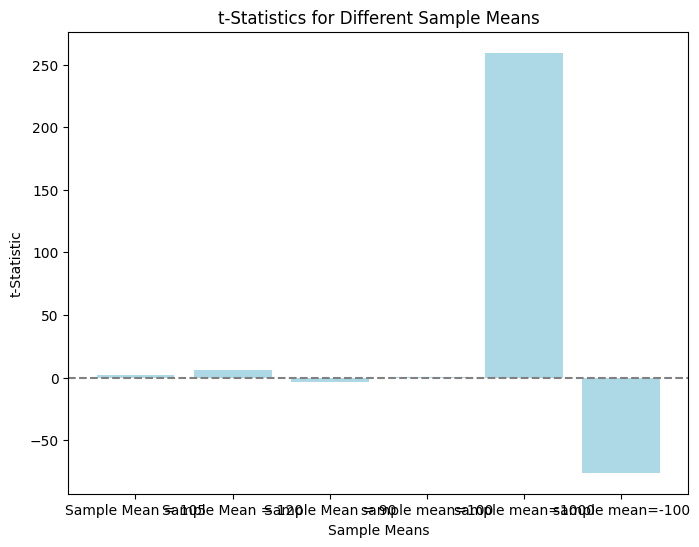

Sample Mean: 105
t-statistic: 1.927
------------------------------
Sample Mean: 120
t-statistic: 5.782
------------------------------
Sample Mean: 90
t-statistic: -3.397
------------------------------
Sample Mean: 100
t-statistic: 0.477
------------------------------
Sample Mean: 1000
t-statistic: 259.476
------------------------------
Sample Mean: -100
t-statistic: -76.036
------------------------------


In [14]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
population_mean = 100    # Known population mean
population_std = 15      # Standard deviation of the population
sample_size = 30         # Sample size

# Generate sample data for different sample means
sample_means = [105, 120, 90,100,1000,-100]  # Different sample means
t_statistics = []

# Calculate t-statistics for each sample mean
for sample_mean in sample_means:
    # Generate sample data (normal distribution with sample mean)
    sample_data = np.random.normal(loc=sample_mean, scale=population_std, size=sample_size)
    
    # Perform one-sample t-test
    t_stat, p_value = stats.ttest_1samp(sample_data, population_mean)
    
    # Store t-statistics
    t_statistics.append(t_stat)

# Plot the t-statistics for each sample mean
plt.figure(figsize=(8, 6))
plt.bar(['Sample Mean = 105', 'Sample Mean = 120', 'Sample Mean = 90','sample mean=100','sample mean=1000','sample mean=-100'], t_statistics, color='lightblue')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('t-Statistics for Different Sample Means')
plt.xlabel('Sample Means')
plt.ylabel('t-Statistic')
plt.show()

# Output the t-statistics and p-values
for i, sample_mean in enumerate(sample_means):
    print(f"Sample Mean: {sample_mean}")
    print(f"t-statistic: {t_statistics[i]:.3f}")
    print('-' * 30)
# more the t statistics more the difference in the sample mean and the population mean

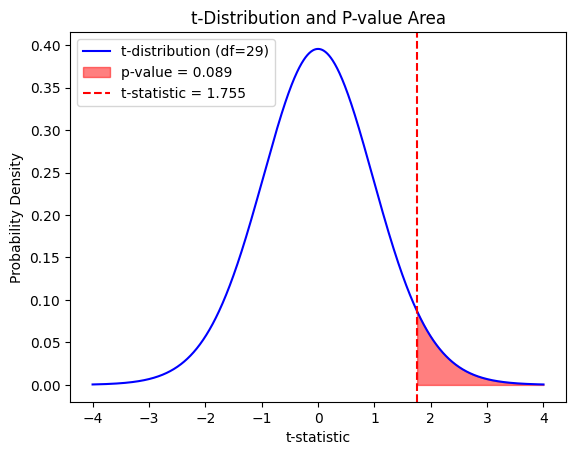

In [15]:
# p value 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Set parameters
population_mean = 100
sample_mean = 105.27
sample_size = 30
population_std = 15
t_stat = 1.755  # Calculated t-statistic

# Degrees of freedom
df = sample_size - 1

# Create x values for the t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Plot the t-distribution
plt.plot(x, y, label='t-distribution (df=29)', color='blue')

# Shade the area corresponding to the p-value
p_value_area = x[x > t_stat]
plt.fill_between(p_value_area, 0, stats.t.pdf(p_value_area, df), color='red', alpha=0.5, label=f'p-value = {round(0.089, 3)}')

# Mark the t-statistic on the plot
plt.axvline(x=t_stat, color='red', linestyle='--', label=f't-statistic = {round(t_stat, 3)}')

# Labels and title
plt.title('t-Distribution and P-value Area')
plt.xlabel('t-statistic')
plt.ylabel('Probability Density')
plt.legend()

plt.show()


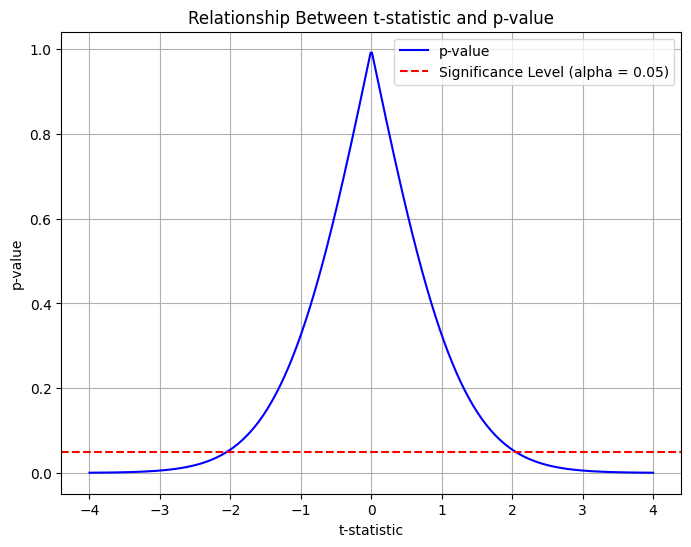

t-statistic: -3.00, p-value: 0.0055
t-statistic: -2.00, p-value: 0.0549
t-statistic: -1.00, p-value: 0.3256
t-statistic: 0.00, p-value: 1.0000
t-statistic: 1.00, p-value: 0.3256
t-statistic: 2.00, p-value: 0.0549
t-statistic: 3.00, p-value: 0.0055


In [16]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
sample_size = 30       # Sample size
population_mean = 100  # Population mean (H0: sample mean = population mean)
population_std = 15    # Standard deviation of the population
alpha = 0.05           # Significance level

# Degrees of freedom
df = sample_size - 1

# Generate a range of t-statistics from -4 to 4
t_values = np.linspace(-4, 4, 400)

# Calculate the corresponding p-values for a two-tailed test
# p-value for a two-tailed test: the probability of observing a t-statistic
# more extreme than the one observed, under the null hypothesis.
p_values = 2 * (1 - stats.t.cdf(np.abs(t_values), df))

# Plot the relationship between t-statistic and p-value
plt.figure(figsize=(8, 6))
plt.plot(t_values, p_values, color='blue', label='p-value')
plt.axhline(y=alpha, color='red', linestyle='--', label='Significance Level (alpha = 0.05)')

# Add labels and title
plt.title('Relationship Between t-statistic and p-value')
plt.xlabel('t-statistic')
plt.ylabel('p-value')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()

# Output a few t-statistics and corresponding p-values
for t_val in [-3, -2, -1, 0, 1, 2, 3]:
    p_val = 2 * (1 - stats.t.cdf(np.abs(t_val), df))
    print(f"t-statistic: {t_val:.2f}, p-value: {p_val:.4f}")


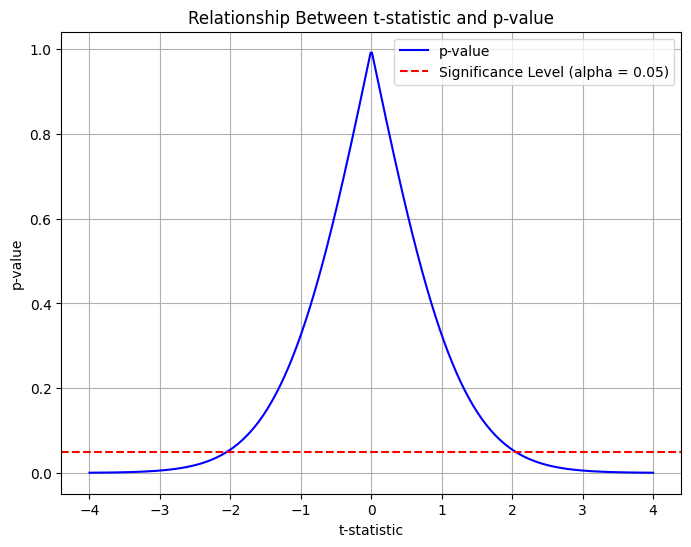

In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
df = 29  # Degrees of freedom (sample size - 1)
t_values = np.linspace(-4, 4, 400)  # t-statistics ranging from -4 to 4

# Calculate the corresponding p-values for a two-tailed test
p_values = 2 * (1 - stats.t.cdf(np.abs(t_values), df))  # Two-tailed p-value

# Plot the relationship between t-statistics and p-values
plt.figure(figsize=(8, 6))
plt.plot(t_values, p_values, color='blue', label='p-value')
plt.axhline(0.05, color='red', linestyle='--', label='Significance Level (alpha = 0.05)')

# Add labels and title
plt.title('Relationship Between t-statistic and p-value')
plt.xlabel('t-statistic')
plt.ylabel('p-value')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()


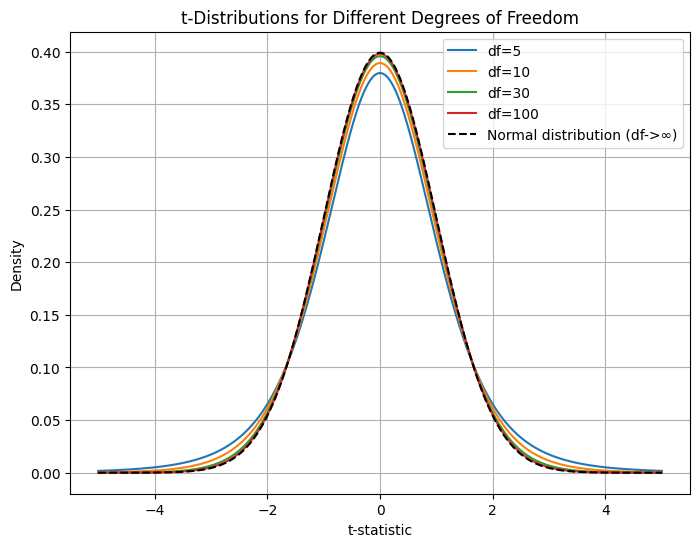

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the range for t-statistics
t_values = np.linspace(-5, 5, 500)

# Degrees of freedom for different distributions
dfs = [5, 10, 30, 100]

# Plot t-distributions with different degrees of freedom
plt.figure(figsize=(8, 6))
for df in dfs:
    plt.plot(t_values, stats.t.pdf(t_values, df), label=f'df={df}')
    
# Plot the standard normal distribution for comparison
plt.plot(t_values, stats.norm.pdf(t_values), 'k--', label='Normal distribution (df->∞)')

# Add labels and title
plt.title('t-Distributions for Different Degrees of Freedom')
plt.xlabel('t-statistic')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
